In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Categorical Exploration

Goals:

* Explore a categorical column, such as `MS Zoning`,by accessing the column and displaying its unique values.
* Visualize the value counts of a categorical column using a bar chart.
* Visualize the value counts of a categorical column using a horizontal bar chart.

In [88]:
path = "/home/dang/Learning/Python Statistics Essential Training/python-statistics-essential-training-4433355-main/data/ames-housing-dataset.zip"
df = pd.read_csv(path, engine="pyarrow", dtype_backend="pyarrow")

df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141,31770,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80,11622,Pave,<NA>,Reg,Lvl,...,0,<NA>,MnPrv,<NA>,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81,14267,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93,11160,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74,13830,Pave,<NA>,IR1,Lvl,...,0,<NA>,MnPrv,<NA>,0,3,2010,WD,Normal,189900


In [89]:
# Create the function

def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes == "int64[pyarrow]"].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = "uint8[pyarrow]"
        elif max_ < 65535:
            mapping[col] = "uint16[pyarrow]"
        elif max_ < 4294967295:
            mapping[col] = "uint32[pyarrow]"
    return df.astype(mapping)

def clean_housing(df):
    return (df
            .assign(**df.select_dtypes("string").replace("", "Missing").astype("category"),
                    **{"Garage Yr Blt": df["Garage Yr Blt"].clip(upper=df["Year Built"].max())})
            .pipe(shrink_ints)    
        )

In [90]:
housing = clean_housing(df)
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141,31770,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80,11622,Pave,<NA>,Reg,Lvl,...,0,<NA>,MnPrv,<NA>,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81,14267,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93,11160,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74,13830,Pave,<NA>,IR1,Lvl,...,0,<NA>,MnPrv,<NA>,0,3,2010,WD,Normal,189900


In [91]:
housing.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [92]:
# Categoricals
(
    housing["MS Zoning"]
)

0       RL
1       RH
2       RL
3       RL
4       RL
        ..
2925    RL
2926    RL
2927    RL
2928    RL
2929    RL
Name: MS Zoning, Length: 2930, dtype: category
Categories (7, string[pyarrow]): [A (agr), C (all), FV, I (all), RH, RL, RM]

In [93]:
# Categoricals
(
    housing["MS Zoning"].value_counts()
)

MS Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: count, dtype: int64

<Axes: xlabel='MS Zoning'>

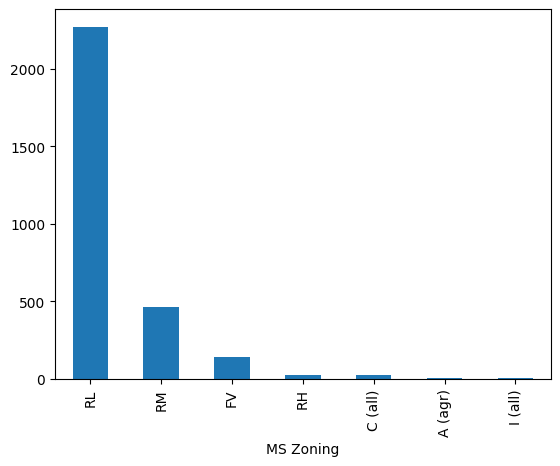

In [94]:
# Categoricals
(
    housing["MS Zoning"].value_counts().plot.bar()
)

<Axes: ylabel='MS Zoning'>

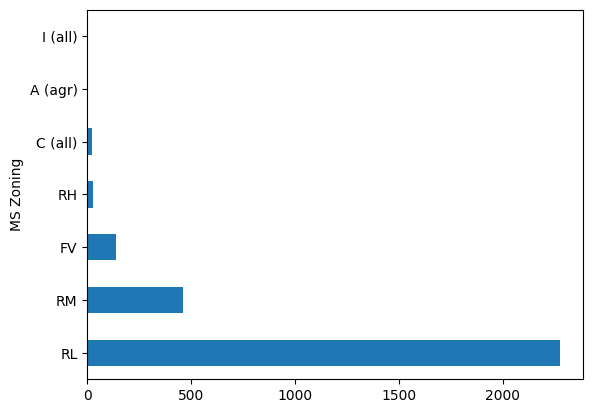

In [95]:
# Categoricals
(
    housing["MS Zoning"].value_counts().plot.barh()
)

# Histogram and Distribution

Goals:
* Obtain descriptive statistics of the "SalePrice" column using the `.describe` method.
* Visualize the distribution of the "SalePrice" column using a histogram.
* Customize the histogram by specifying the number of bins using the `bins` parameter.

In [96]:
# Numerical
(housing
 .SalePrice
 .describe()
)

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: double[pyarrow]

<Axes: >

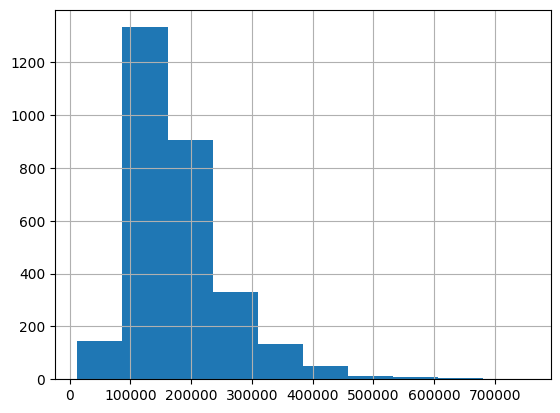

In [97]:
# Numerical
(housing
 .SalePrice
 .hist()
)

<Axes: >

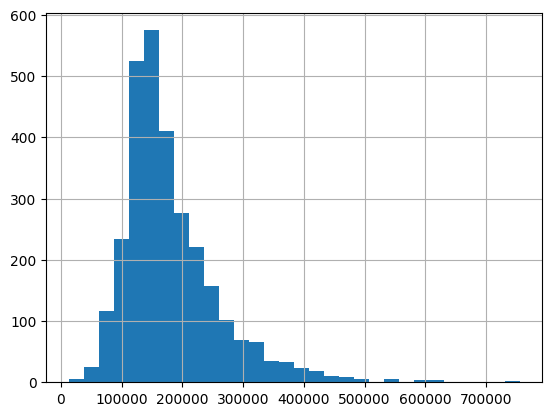

In [98]:
# Numerical
(housing
 .SalePrice
 .hist(bins=30)
)

<Axes: >

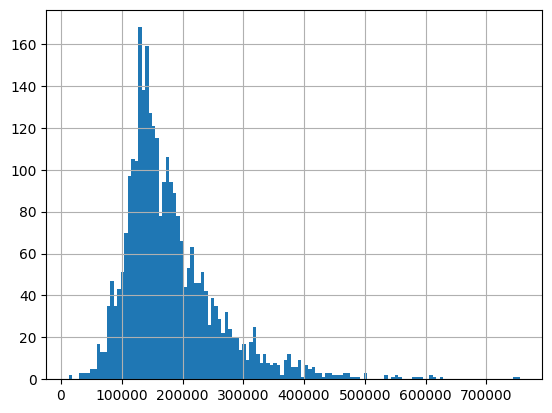

In [99]:
# Numerical
(housing
 .SalePrice
 .hist(bins=130)
)

# Outliers and Z-scores

Goals:
* Caculate the Z-score for the "SalePrice" column using the `calc_z` function.
* Identify outliers based on the Z-score by assigning a boolean column indicating whether Z-score is greater than or equal to 3 or less than or equal to -3.
* Identify outliers using the IQR (interquartile range) method by assigning a boolean column indicating whether the values are outside the range of median $\pm$ 3 * IQR.

In [100]:
# Outlier with Z-score
def calc_z(df, col):
    mean = df[col].mean()
    std  = df[col].std()
    return (df[col] - mean)/std

(housing
    .pipe(calc_z, col="SalePrice")
)

0       0.428156
1      -0.948795
2      -0.110107
3       0.791170
4       0.113961
          ...   
2925   -0.479380
2926   -0.623334
2927   -0.610816
2928   -0.135142
2929    0.090177
Name: SalePrice, Length: 2930, dtype: double[pyarrow]

In [101]:
(housing
    .assign(z_score=calc_z(housing, col="SalePrice"))
    .query("z_score.abs() >= 3")
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,z_score
15,16,527216070,60,RL,47,53504,Pave,<NA>,IR2,HLS,...,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,538000,4.471382
44,45,528150070,20,RL,100,12919,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,3,2010,New,Partial,611657,5.393401
46,47,528176010,20,RL,110,14300,Pave,<NA>,Reg,HLS,...,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,500000,3.995709
366,367,527214050,20,RL,63,17423,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,7,2009,New,Partial,501837,4.018704
421,422,528102140,60,RL,110,14257,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,6,2009,WD,Normal,462000,3.520035
422,423,528104070,60,RL,104,13518,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,7,2009,New,Partial,485000,3.807943
423,424,528106020,20,RL,105,15431,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,4,2009,WD,Normal,555000,4.684184
431,432,528110010,60,RL,97,13478,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,6,2009,ConLI,Normal,451950,3.394232
432,433,528110020,20,RL,105,13693,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,3,2009,WD,Normal,610000,5.372659
433,434,528110090,60,RL,107,13891,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,1,2009,New,Partial,582933,5.033841


In [102]:
(housing
    .assign(z_score=calc_z(housing, col="SalePrice"))
    #.query("z_score.abs() >= 3")
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,z_score
0,1,526301100,20,RL,141,31770,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,5,2010,WD,Normal,215000,0.428156
1,2,526350040,20,RH,80,11622,Pave,<NA>,Reg,Lvl,...,<NA>,MnPrv,<NA>,0,6,2010,WD,Normal,105000,-0.948795
2,3,526351010,20,RL,81,14267,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,Gar2,12500,6,2010,WD,Normal,172000,-0.110107
3,4,526353030,20,RL,93,11160,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,4,2010,WD,Normal,244000,0.791170
4,5,527105010,60,RL,74,13830,Pave,<NA>,IR1,Lvl,...,<NA>,MnPrv,<NA>,0,3,2010,WD,Normal,189900,0.113961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37,7937,Pave,<NA>,IR1,Lvl,...,<NA>,GdPrv,<NA>,0,3,2006,WD,Normal,142500,-0.479380
2926,2927,923276100,20,RL,<NA>,8885,Pave,<NA>,IR1,Low,...,<NA>,MnPrv,<NA>,0,6,2006,WD,Normal,131000,-0.623334
2927,2928,923400125,85,RL,62,10441,Pave,<NA>,Reg,Lvl,...,<NA>,MnPrv,Shed,700,7,2006,WD,Normal,132000,-0.610816
2928,2929,924100070,20,RL,77,10010,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,4,2006,WD,Normal,170000,-0.135142


In [103]:
def calz_iqr_outlier(df, col):
    ser = df[col]
    iqr = ser.quantile(.75) - ser.quantile(.25)
    med = ser.median()
    small_mask = ser < med-iqr*3
    large_mask = ser > med+iqr*3
    return small_mask | large_mask

(housing
    .assign(iqr_outlier=calz_iqr_outlier(housing, "SalePrice"))
    .query("iqr_outlier")
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,iqr_outlier
15,16,527216070,60,RL,47,53504,Pave,<NA>,IR2,HLS,...,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,538000,True
44,45,528150070,20,RL,100,12919,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,3,2010,New,Partial,611657,True
46,47,528176010,20,RL,110,14300,Pave,<NA>,Reg,HLS,...,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,500000,True
366,367,527214050,20,RL,63,17423,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,7,2009,New,Partial,501837,True
421,422,528102140,60,RL,110,14257,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,6,2009,WD,Normal,462000,True
422,423,528104070,60,RL,104,13518,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,7,2009,New,Partial,485000,True
423,424,528106020,20,RL,105,15431,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,4,2009,WD,Normal,555000,True
431,432,528110010,60,RL,97,13478,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,6,2009,ConLI,Normal,451950,True
432,433,528110020,20,RL,105,13693,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,3,2009,WD,Normal,610000,True
433,434,528110090,60,RL,107,13891,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,1,2009,New,Partial,582933,True


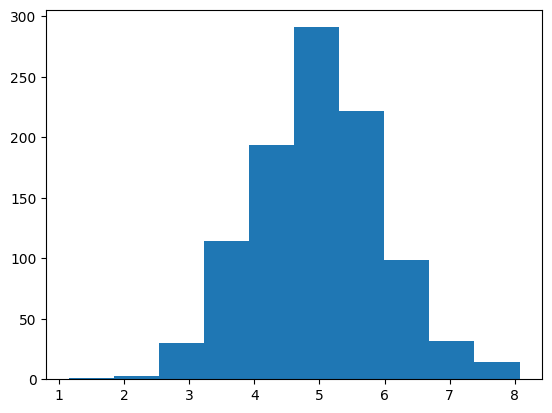

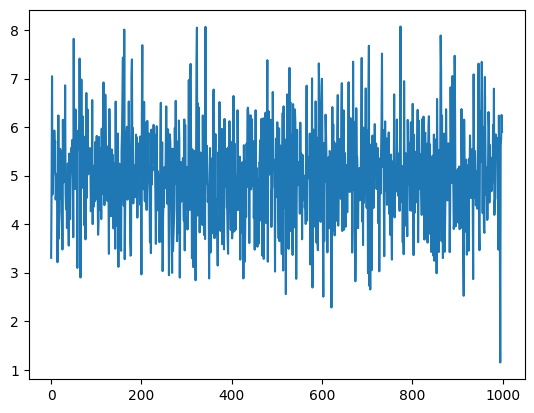

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

mu, sigma = 5, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
z = (5-mu)/sigma
plt.hist(s)
plt.show()
scipy.stats.norm.cdf(z)
np.percentile(s, 50)
plt.plot(s)

# Correlations

Goals:
* Calculate the Pearson correlation
* Calculate the Spearman correlation
* Color a correlation matrix appropriately

In [104]:
housing.corr(numeric_only=True)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285


<Axes: >

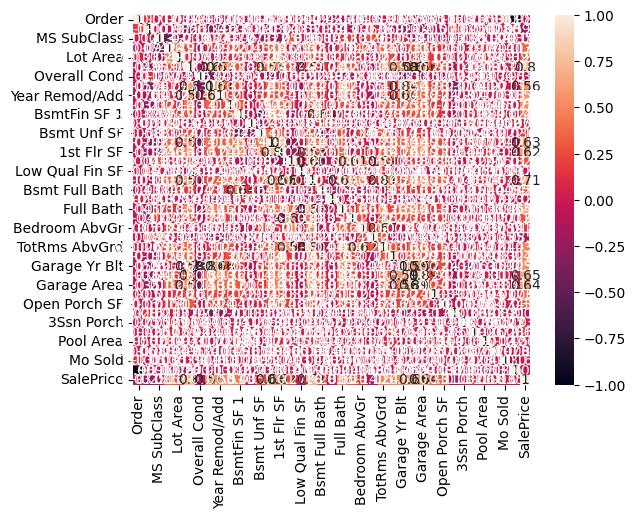

In [105]:
import seaborn as sns

sns.heatmap(housing.corr(numeric_only=True), annot=True, vmin=-1, vmax=1)

In [106]:
(housing
    .corr(method="spearman", numeric_only=True)
    .style
    .background_gradient()
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.205863,0.015074,-0.024209,0.012684,-0.049175,-0.015534,-0.056978,-0.084144,-0.041604,-0.034229,-0.018105,0.007011,-0.023661,-0.007155,-0.003142,0.026532,-0.023809,-0.041665,0.019375,-0.048754,-0.036492,0.014230,-0.015031,0.001629,-0.022008,-0.056214,-0.037003,-0.034251,-0.025811,0.000760,0.025225,-0.015117,0.006032,0.047986,-0.038106,0.142150,-0.977264,-0.035703
PID,0.205863,1.000000,-0.026875,-0.096820,-0.040342,-0.314353,0.111922,-0.314979,-0.208414,-0.237169,-0.050349,0.012860,-0.131413,-0.188111,-0.130427,-0.069092,0.047204,-0.165111,-0.009074,0.035377,-0.235566,-0.186542,-0.014036,0.084954,-0.130301,-0.151539,-0.274244,-0.276663,-0.207054,-0.092368,-0.176972,0.152769,0.005809,0.006353,0.003222,0.018754,-0.051290,0.003198,-0.270660
MS SubClass,0.015074,-0.026875,1.000000,-0.363408,-0.320550,0.103475,-0.065550,0.035632,0.015590,-0.009247,-0.098222,-0.093004,-0.113501,-0.300856,-0.278139,0.478281,0.059254,0.186612,-0.040172,0.004709,0.198671,0.266447,0.056779,0.269444,0.137183,0.010696,0.084326,0.020071,-0.047607,0.019062,0.030639,-0.005318,-0.033196,-0.039486,-0.001964,-0.031959,0.014999,-0.021873,0.001973
Lot Frontage,-0.024209,-0.096820,-0.363408,1.000000,0.659412,0.223162,-0.104785,0.192888,0.134932,0.275334,0.156582,0.044513,0.092700,0.375535,0.442289,0.000692,-0.042646,0.361933,0.103704,-0.029865,0.209843,0.077310,0.288409,0.010360,0.362169,0.248728,0.126930,0.348630,0.375849,0.118401,0.173802,-0.092787,0.010447,0.086195,0.083211,0.037856,0.013041,0.003559,0.397980
Lot Area,0.012684,-0.040342,-0.320550,0.659412,1.000000,0.196855,-0.079006,0.121151,0.103266,0.205822,0.171376,0.057461,0.068211,0.352739,0.439129,0.064565,-0.016875,0.418321,0.106726,0.009234,0.224679,0.128025,0.298550,-0.025662,0.383795,0.311907,0.073599,0.344115,0.370980,0.177609,0.171777,-0.042467,0.029028,0.091527,0.083071,0.073861,0.004774,-0.021720,0.429249
Overall Qual,-0.049175,-0.314353,0.103475,0.223162,0.196855,1.000000,-0.189638,0.664590,0.579323,0.423202,0.179239,-0.091898,0.239273,0.472852,0.415988,0.237677,-0.050242,0.577780,0.148886,-0.047082,0.556720,0.294043,0.077886,-0.170318,0.378023,0.419263,0.638165,0.611424,0.547140,0.290231,0.440433,-0.192093,0.019398,0.026212,0.033057,-0.076443,0.029163,-0.017015,0.808800
Overall Cond,-0.015534,0.111922,-0.065550,-0.104785,-0.079006,-0.189638,1.000000,-0.422306,-0.075119,-0.181996,-0.020644,0.095954,-0.123413,-0.223382,-0.187027,-0.012957,0.018427,-0.189100,-0.045087,0.089080,-0.282743,-0.106949,-0.012151,-0.084478,-0.126437,-0.056648,-0.395204,-0.258175,-0.216048,-0.036363,-0.175446,0.134745,0.044303,0.050333,-0.020386,0.061434,-0.006480,0.039612,-0.165657
Year Built,-0.056978,-0.314979,0.035632,0.192888,0.121151,0.664590,-0.422306,1.000000,0.707678,0.398747,0.214515,-0.095639,0.124441,0.442113,0.324522,0.022695,-0.123324,0.317367,0.187555,-0.054695,0.536116,0.265468,-0.032275,-0.129373,0.181709,0.199048,0.900386,0.600675,0.533612,0.296569,0.402890,-0.434250,0.011180,-0.066507,0.004203,-0.079103,0.016111,-0.009527,0.680822
Year Remod/Add,-0.084144,-0.208414,0.015590,0.134932,0.103266,0.579323,-0.075119,0.707678,1.000000,0.249285,0.087763,-0.116761,0.167045,0.309842,0.250180,0.090110,-0.058727,0.318917,0.120280,-0.057018,0.455856,0.179883,-0.032359,-0.144737,0.207894,0.148938,0.742208,0.460615,0.409481,0.249966,0.372293,-0.268871,0.049288,-0.058677,-0.011139,-0.057701,0.014296,0.041084,0.601454
Mas Vnr Area,-0.041604,-0.237169,-0.009247,0.275334,0.205822,0.423202,-0.181996,0.398747,0.249285,1.000000,0.270651,-0.028671,0.055245,

In [107]:
(housing
    .corr(method="spearman", numeric_only=True)
    .style
    .background_gradient(cmap="RdBu", vmin=-1, vmax=1)
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.205863,0.015074,-0.024209,0.012684,-0.049175,-0.015534,-0.056978,-0.084144,-0.041604,-0.034229,-0.018105,0.007011,-0.023661,-0.007155,-0.003142,0.026532,-0.023809,-0.041665,0.019375,-0.048754,-0.036492,0.014230,-0.015031,0.001629,-0.022008,-0.056214,-0.037003,-0.034251,-0.025811,0.000760,0.025225,-0.015117,0.006032,0.047986,-0.038106,0.142150,-0.977264,-0.035703
PID,0.205863,1.000000,-0.026875,-0.096820,-0.040342,-0.314353,0.111922,-0.314979,-0.208414,-0.237169,-0.050349,0.012860,-0.131413,-0.188111,-0.130427,-0.069092,0.047204,-0.165111,-0.009074,0.035377,-0.235566,-0.186542,-0.014036,0.084954,-0.130301,-0.151539,-0.274244,-0.276663,-0.207054,-0.092368,-0.176972,0.152769,0.005809,0.006353,0.003222,0.018754,-0.051290,0.003198,-0.270660
MS SubClass,0.015074,-0.026875,1.000000,-0.363408,-0.320550,0.103475,-0.065550,0.035632,0.015590,-0.009247,-0.098222,-0.093004,-0.113501,-0.300856,-0.278139,0.478281,0.059254,0.186612,-0.040172,0.004709,0.198671,0.266447,0.056779,0.269444,0.137183,0.010696,0.084326,0.020071,-0.047607,0.019062,0.030639,-0.005318,-0.033196,-0.039486,-0.001964,-0.031959,0.014999,-0.021873,0.001973
Lot Frontage,-0.024209,-0.096820,-0.363408,1.000000,0.659412,0.223162,-0.104785,0.192888,0.134932,0.275334,0.156582,0.044513,0.092700,0.375535,0.442289,0.000692,-0.042646,0.361933,0.103704,-0.029865,0.209843,0.077310,0.288409,0.010360,0.362169,0.248728,0.126930,0.348630,0.375849,0.118401,0.173802,-0.092787,0.010447,0.086195,0.083211,0.037856,0.013041,0.003559,0.397980
Lot Area,0.012684,-0.040342,-0.320550,0.659412,1.000000,0.196855,-0.079006,0.121151,0.103266,0.205822,0.171376,0.057461,0.068211,0.352739,0.439129,0.064565,-0.016875,0.418321,0.106726,0.009234,0.224679,0.128025,0.298550,-0.025662,0.383795,0.311907,0.073599,0.344115,0.370980,0.177609,0.171777,-0.042467,0.029028,0.091527,0.083071,0.073861,0.004774,-0.021720,0.429249
Overall Qual,-0.049175,-0.314353,0.103475,0.223162,0.196855,1.000000,-0.189638,0.664590,0.579323,0.423202,0.179239,-0.091898,0.239273,0.472852,0.415988,0.237677,-0.050242,0.577780,0.148886,-0.047082,0.556720,0.294043,0.077886,-0.170318,0.378023,0.419263,0.638165,0.611424,0.547140,0.290231,0.440433,-0.192093,0.019398,0.026212,0.033057,-0.076443,0.029163,-0.017015,0.808800
Overall Cond,-0.015534,0.111922,-0.065550,-0.104785,-0.079006,-0.189638,1.000000,-0.422306,-0.075119,-0.181996,-0.020644,0.095954,-0.123413,-0.223382,-0.187027,-0.012957,0.018427,-0.189100,-0.045087,0.089080,-0.282743,-0.106949,-0.012151,-0.084478,-0.126437,-0.056648,-0.395204,-0.258175,-0.216048,-0.036363,-0.175446,0.134745,0.044303,0.050333,-0.020386,0.061434,-0.006480,0.039612,-0.165657
Year Built,-0.056978,-0.314979,0.035632,0.192888,0.121151,0.664590,-0.422306,1.000000,0.707678,0.398747,0.214515,-0.095639,0.124441,0.442113,0.324522,0.022695,-0.123324,0.317367,0.187555,-0.054695,0.536116,0.265468,-0.032275,-0.129373,0.181709,0.199048,0.900386,0.600675,0.533612,0.296569,0.402890,-0.434250,0.011180,-0.066507,0.004203,-0.079103,0.016111,-0.009527,0.680822
Year Remod/Add,-0.084144,-0.208414,0.015590,0.134932,0.103266,0.579323,-0.075119,0.707678,1.000000,0.249285,0.087763,-0.116761,0.167045,0.309842,0.250180,0.090110,-0.058727,0.318917,0.120280,-0.057018,0.455856,0.179883,-0.032359,-0.144737,0.207894,0.148938,0.742208,0.460615,0.409481,0.249966,0.372293,-0.268871,0.049288,-0.058677,-0.011139,-0.057701,0.014296,0.041084,0.601454
Mas Vnr Area,-0.041604,-0.237169,-0.009247,0.275334,0.205822,0.423202,-0.181996,0.398747,0.249285,1.000000,0.270651,-0.028671,0.055245,

# Scatter Plots

Goals:
* Create a scatter plot
* Set transpareny
* Jitter plot values

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

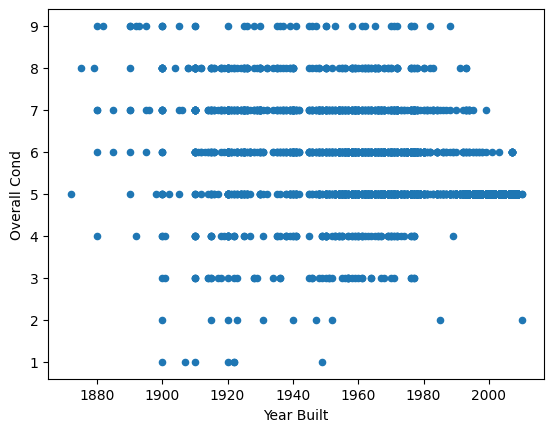

In [108]:
(housing
    .plot
    .scatter(x="Year Built", y="Overall Cond")
)

In [109]:
housing["Year Built"].corr(housing["Overall Cond"], method="spearman")

-0.42230619262743263

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

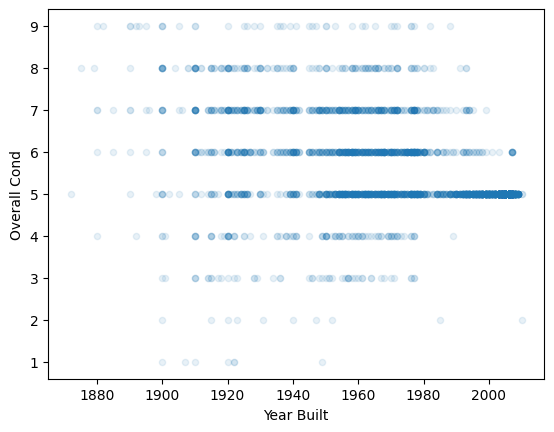

In [110]:
(housing
    .plot
    .scatter(x="Year Built", y="Overall Cond", alpha=.1)
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

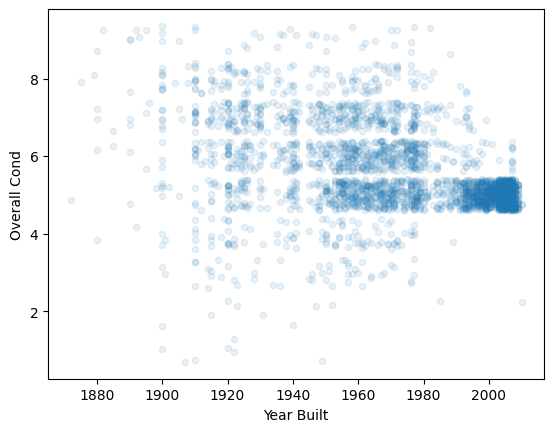

In [111]:
# with jitter in y
(housing
    .assign(**{"Overall Cond": housing["Overall Cond"] + np.random.random(len(housing))*.8 - .4})
    .plot
    .scatter(x="Year Built", y="Overall Cond", alpha=.1)
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

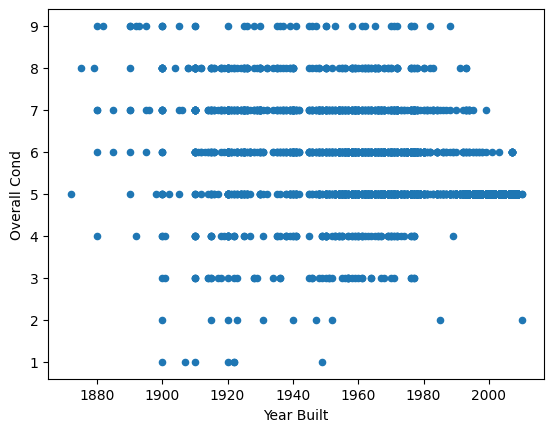

In [121]:
def jitter(df_, col, amount=.5):
    return (df_[col] + np.random.random(len(df_))*amount - (amount/2))

(housing
    .assign(**{"Overal Cond": jitter(housing, "Overall Cond", amount=.8)})
    .plot
    .scatter(x="Year Built", y="Overall Cond", alpha=1)
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

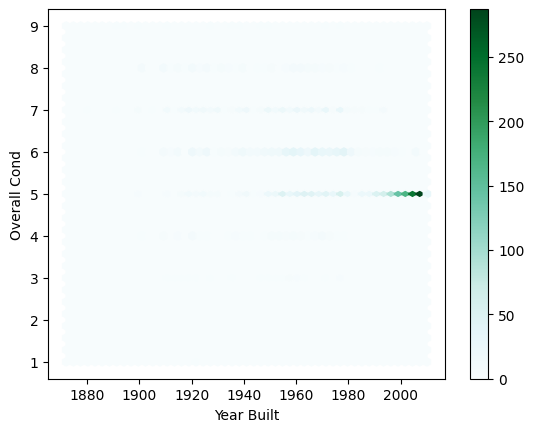

In [123]:
(housing
    .plot
    .hexbin(x="Year Built", y="Overall Cond", alpha=1, gridsize=50)
)

# Visualizing Categoricals and Numerical Values

Goals:
* Create a box plot of a single column
* Create a box plot of multiple columns
* Use the `.pivol` method
* Use Seaborn to create other distribution plots by category

<Axes: >

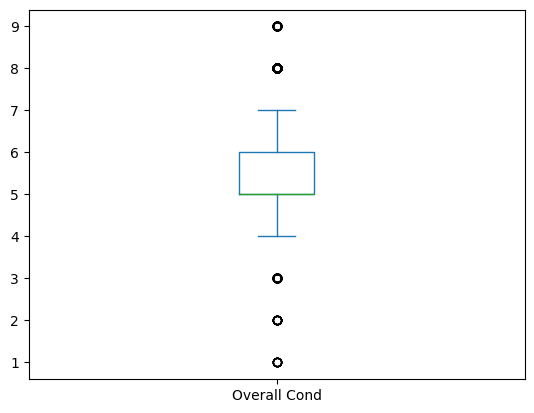

In [124]:
# Numerical and categorical
(housing
    .plot
    .box(x="Year Built", y="Overall Cond")
)

<Axes: >

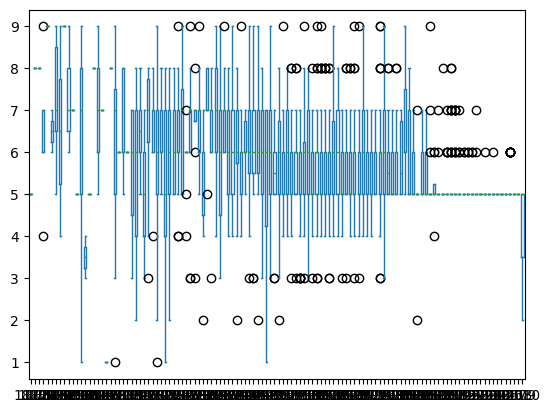

In [126]:
# Make multiple box plots
(housing
    .pivot(columns='Year Built', values="Overall Cond")
    .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
    .plot.box()
)

<Axes: >

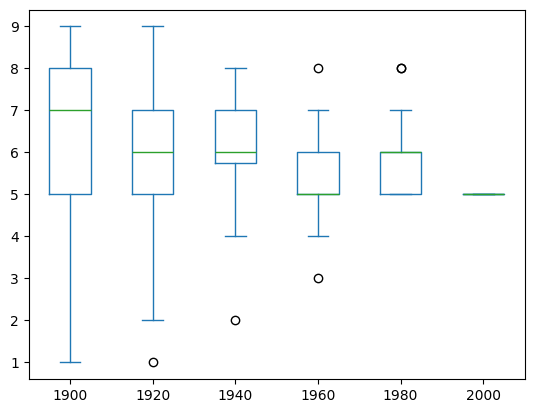

In [127]:
(housing
    .pivot(columns='Year Built', values="Overall Cond")
    .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
    .loc[:, [1900, 1920, 1940, 1960, 1980, 2000]]
    .plot.box()
)

<Axes: >

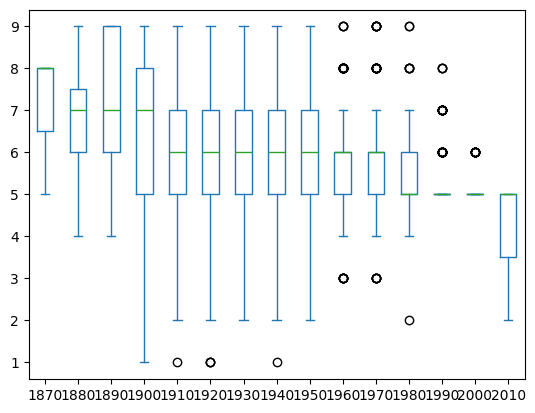

In [130]:
# Group by decade
(housing
    .assign(decade=(housing["Year Built"]//10) * 10)
    .pivot(columns="decade", values="Overall Cond")
    .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
    .plot.box()
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

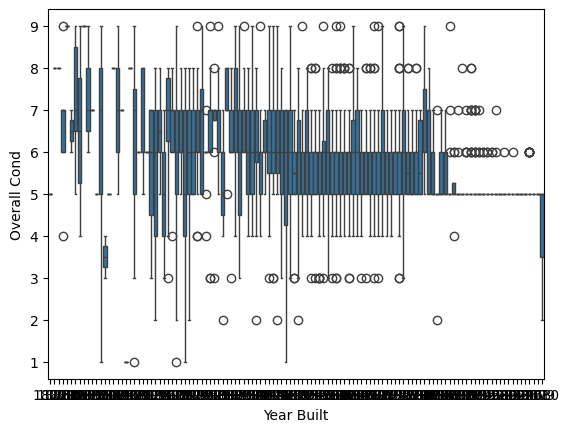

In [131]:
# Using seaborn
import seaborn as sns
sns.boxplot(data=housing, x="Year Built", y="Overall Cond")

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

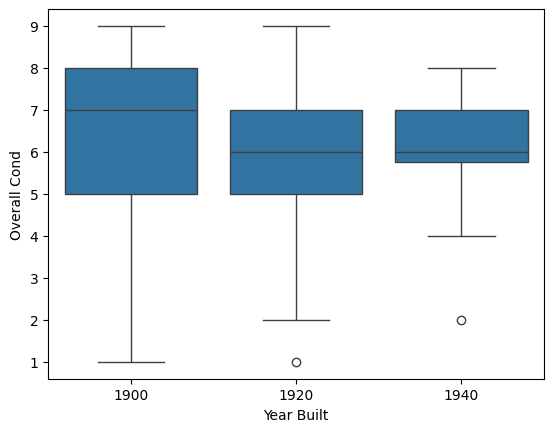

In [132]:
sns.boxplot(data=housing, x="Year Built", y="Overall Cond"
            , order=[1900, 1920, 1940])

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

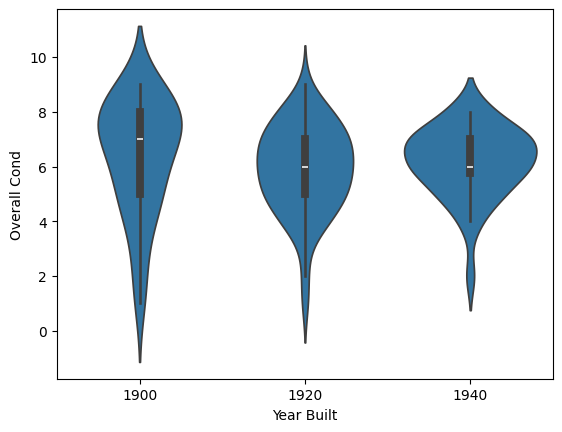

In [133]:
sns.violinplot(data=housing, x="Year Built", y="Overall Cond"
            , order=[1900, 1920, 1940])

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

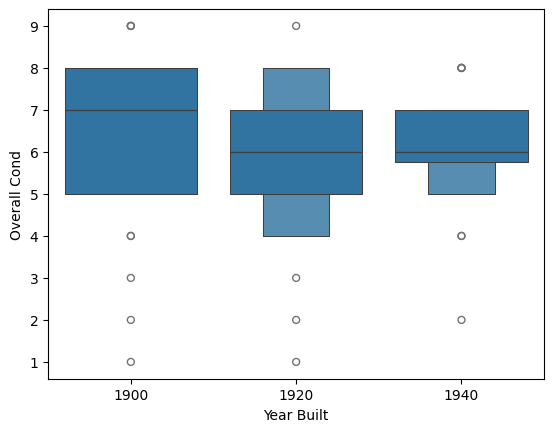

In [134]:
sns.boxenplot(data=housing, x="Year Built", y="Overall Cond"
            , order=[1900, 1920, 1940])

# Comparing Two Categoricals

Goals:
* Create a cross-tabulation
* Style the cross-tabulation table
* Explore the documention of the `.background_gradient` method of pandas styling
* Create a stacked bar plot of cross-tabulation

In [135]:
# 2 Categoricals
housing.dtypes[:40]

Order             uint16[pyarrow]
PID               uint32[pyarrow]
MS SubClass        uint8[pyarrow]
MS Zoning                category
Lot Frontage      uint16[pyarrow]
Lot Area          uint32[pyarrow]
Street                   category
Alley                    category
Lot Shape                category
Land Contour             category
Utilities                category
Lot Config               category
Land Slope               category
Neighborhood             category
Condition 1              category
Condition 2              category
Bldg Type                category
House Style              category
Overall Qual       uint8[pyarrow]
Overall Cond       uint8[pyarrow]
Year Built        uint16[pyarrow]
Year Remod/Add    uint16[pyarrow]
Roof Style               category
Roof Matl                category
Exterior 1st             category
Exterior 2nd             category
Mas Vnr Type             category
Mas Vnr Area      uint16[pyarrow]
Exter Qual               category
Exter Cond    

In [136]:
# 2 Categoricals - Cross tabulation
(housing
    .groupby(['Overall Qual', 'Bsmt Cond'])
    .size()
    .unstack()
)

/tmp/ipykernel_17705/944938533.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Overall Qual', 'Bsmt Cond'])


Bsmt Cond,Ex,Fa,Gd,Po,TA
Overall Qual,,,,,
1,0,0,0,1,0
2,0,4,0,0,5
3,0,9,0,0,21
4,0,16,2,1,182
5,1,39,24,2,727
6,1,28,28,0,672
7,0,5,33,0,561
8,1,3,25,1,320
9,0,0,9,0,98


In [137]:
(
    pd.crosstab(index=housing["Overall Qual"], columns=housing["Bsmt Cond"])
)

Bsmt Cond,Ex,Fa,Gd,Po,TA
Overall Qual,,,,,
1,0,0,0,1,0
2,0,4,0,0,5
3,0,9,0,0,21
4,0,16,2,1,182
5,1,39,24,2,727
6,1,28,28,0,672
7,0,5,33,0,561
8,1,3,25,1,320
9,0,0,9,0,98


In [138]:
(
    pd.crosstab(index=housing["Overall Qual"], columns=housing["Bsmt Cond"])
    .style
    .background_gradient(cmap="viridis", axis=None)
)

Bsmt Cond,Ex,Fa,Gd,Po,TA
Overall Qual,,,,,
1,0,0,0,1,0
2,0,4,0,0,5
3,0,9,0,0,21
4,0,16,2,1,182
5,1,39,24,2,727
6,1,28,28,0,672
7,0,5,33,0,561
8,1,3,25,1,320
9,0,0,9,0,98


In [142]:
housing.style.background_gradient?

Signature:
housing.style.background_gradient(
    cmap: 'str | Colormap' = 'PuBu',
    low: 'float' = 0,
    high: 'float' = 0,
    axis: 'Axis | None' = 0,
    subset: 'Subset | None' = None,
    text_color_threshold: 'float' = 0.408,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    gmap: 'Sequence | None' = None,
) -> 'Styler'
Docstring:
Color the background in a gradient style.

The background color is determined according
to the data in each column, row or frame, or by a given
gradient map. Requires matplotlib.

Parameters
----------
cmap : str or colormap
    Matplotlib colormap.
low : float
    Compress the color range at the low end. This is a multiple of the data
    range to extend below the minimum; good values usually in [0, 1],
    defaults to 0.
high : float
    Compress the color range at the high end. This is a multiple of the data
    range to extend above the maximum; good values usually in [0, 1],
    defaults to 0.
axis : {0, 1, "index", "columns

In [144]:
# Reorder
# Ex: Excellent
# GD: Good
# TA: Typical - slight dampness allowed
# Fa: Fair - dampness or some cracking or settling
# Po: Poor - Severe cracking, settling, or wetness

(
    pd.crosstab(index=housing["Overall Qual"], columns=housing["Bsmt Cond"])
    .loc[:, ['Ex', 'Gd', 'TA', 'Fa', 'Po']]
    .style
    .background_gradient(cmap="viridis", axis=None)
)

Bsmt Cond,Ex,Gd,TA,Fa,Po
Overall Qual,,,,,
1,0,0,0,0,1
2,0,0,5,4,0
3,0,0,21,9,0
4,0,2,182,16,1
5,1,24,727,39,2
6,1,28,672,28,0
7,0,33,561,5,0
8,1,25,320,3,1
9,0,9,98,0,0


<Axes: xlabel='Overall Qual'>

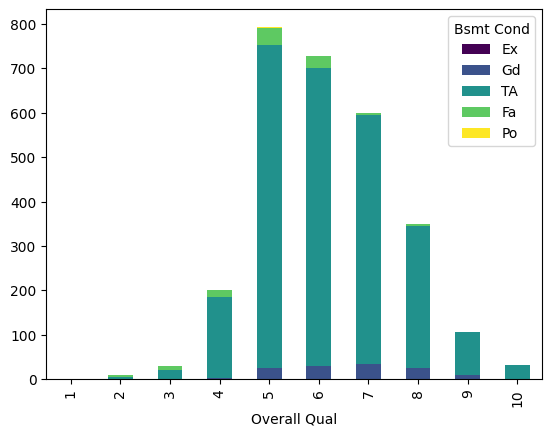

In [146]:
# Reorder
# Ex: Excellent
# GD: Good
# TA: Typical - slight dampness allowed
# Fa: Fair - dampness or some cracking or settling
# Po: Poor - Severe cracking, settling, or wetness

(
    pd.crosstab(index=housing["Overall Qual"], columns=housing["Bsmt Cond"])
    .loc[:, ['Ex', 'Gd', 'TA', 'Fa', 'Po']]
    .plot.bar(stacked=True, cmap="viridis")
)